In [1]:
import math
import sympy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# init_printing(use_unicode=True)

In [5]:
np.__version__

'1.15.3'

# 1.概率论

## 排列组合

#### 二项式定理：$(a+b)^{n}=\sum_{r=0}^{n}C_n^r a^{n-r}b^{r}$

##### $A^r_n=\frac{n!}{(n-r)!},C^r_n=\frac{n!}{r!(n-r)!}$;
##### $A^2_3=6,C^2_3=\left(\begin{array}{c}3\\ 2\end{array}\right)=3$

In [6]:
from scipy.special import comb, perm
perm(3, 2), comb(3, 2), sympy.binomial(3, 2)    #排列、组合,sympy的binomial函数等价scipy的comb

(6.0, 3.0, 3)

## 相关

degree： 0.0 Pearson corr:  6.199966789742345e-17
degree： 18.0 Pearson corr:  0.3796250614666161
degree： 36.0 Pearson corr:  0.5531318968106568
degree： 54.0 Pearson corr:  0.5531318968106566
degree： 72.0 Pearson corr:  0.3796250614666161
degree： 90.0 Pearson corr:  7.439960147690813e-17


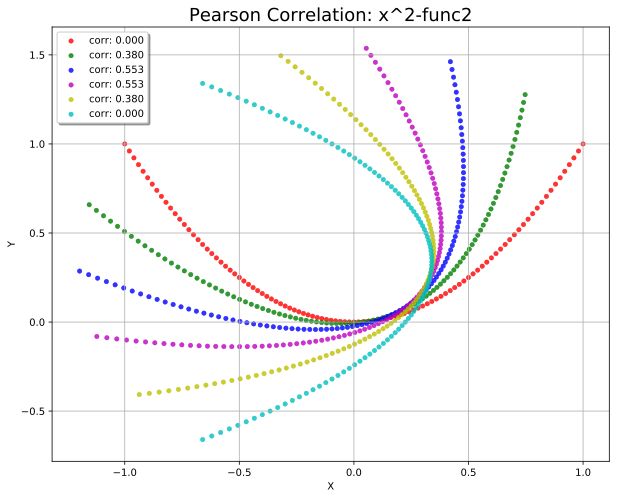

In [13]:
def rotate(x, y, theta=45):
    data = np.vstack((x, y))         #纵向堆叠，合并到一个列表中, shape:(2, len)
#   print('data: ', data)
    mu = np.mean(data, axis=1)       #分别求取二者均值，shape:(2, )
    mu = mu.reshape((-1, 1))         #变为一列, shape:(2, 1)
    #print('mu: ', mu, mu.shape)
    data -= mu                       #每列减去均值,得到离差
    #print(data)
    theta = math.radians(theta)      #转换为弧度
    c = np.cos(theta)                #cos
    s = np.sin(theta)                #sin
    m = np.array(((c, -s), (s, c)))  #矩阵为[[cos, -sin],[sin, cos]]
    return m.dot(data) + mu          #点乘后加均值


def pearson(x, y, tip):
    clrs = list('rgbmycrgbmycrgbmycrgbmyc')
    plt.figure(figsize=(10, 8), facecolor='w')
    for i, theta in enumerate(np.linspace(0, 90, 6)):    #从0-90度取6个角度
        xr, yr = rotate(x, y, theta)
        p = stats.pearsonr(xr, yr)[0]                    #求相关系数
        print('degree：', theta, 'Pearson corr: ', p)
        strr = 'corr: %.3f' % p
        plt.scatter(xr, yr, s=20, alpha=0.8, linewidths=0.5, c=clrs[i], marker='o', label=strr)
    plt.legend(loc='upper left', shadow=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Pearson Correlation: %s' % tip, fontsize=18)
    plt.grid(b=True)
    plt.show()


if __name__ == '__main__':
    # warnings.filterwarnings(action='ignore', category=RuntimeWarning)
    np.random.seed(0)

    N = 1000
    
    # tip = 'x-func'
    # x = np.random.rand(N)
    # y = np.zeros(N) + np.random.randn(N)*0.001

    # tip = u'x^2-func1'
    # x = np.random.rand(N)
    # y = x ** 2 #+ np.random.randn(N)*0.002

    # tip = 'tan-func'
    # x = np.random.rand(N) * 1.4
    # y = np.tan(x)

    tip = 'x^2-func2'
    x = np.linspace(-1, 1, 101)
    y = x ** 2

    # tip = u'eplip-fucs'
    # x, y = np.random.rand(2, N) * 60 - 30
    # y /= 5
    # idx = (x**2 / 900 + y**2 / 36 < 1)
    # x = x[idx]
    # y = y[idx]

    pearson(x, y, tip)


# 2.统计

##  rv_continuous 代表连续型随机变量，rv_discrete 代表离散型随机变量

In [3]:
print("连续型：", [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)], sep = "\t", end = "")
print("")
print("离散型：", [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)], sep = "\t", end = "")

连续型：	['ksone', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'weibull_max', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'reciprocal', 'rice', 'recipinvgauss', 'semicircular', 'skewnorm', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukey

## 生成正态分布

In [8]:
X = stats.norm(loc = 3.7, scale = 0.97)    ##µ = 3.7，σ = 0.97
X.stats()

(array(3.7), array(0.9409))

In [9]:
x = X.rvs(size = 10000)    #对随机变量取10000个值
print("对μ=1，σ=2的总体取样1w次得样本：{0}，均值：{1}，标准差：{2}".format(x, np.mean(x), np.std(x)))    #期望值与方差
x.max(),x.min()

对μ=1，σ=2的总体取样1w次得样本：[2.84248158 2.74747252 3.46810753 ... 5.76474794 3.59489577 2.35530589]，均值：3.7078622255867697，标准差：0.9720341862862593


(7.405698156147847, 0.01863184277697849)

In [10]:
stats.norm.fit(x)

(3.7078622255867697, 0.9720341862862593)

## 绘制分布图

正态分布，Probability Density Function(pdf) = $\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

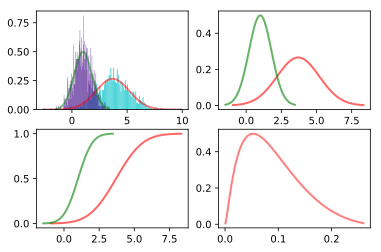

In [3]:
mu1, sigma1, samples = 3.7, 1.5, 1000
mu2, sigma2, samples = 1, 0.8, 1000
rate1 = np.random.normal(mu1, sigma1, samples)
rate2 = stats.norm.rvs(mu2, sigma2, samples)

plt.figure()

'''绘制离散正态分布'''
plt.subplot(221)
count, bins, ignored = plt.hist(rate1, 150, density=True, color='#2dccd3', alpha = 0.9)    #count = 每一bin区间对应概率值, bins = 每个bin的分界值(对应左侧)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), 'r-', lw=2, alpha = 0.5)

count, bins, ignored = plt.hist(rate2, 150, density=True, color='#4A148C', alpha = 0.9)    #count = 每一bin区间对应概率值, bins = 每个bin的分界值(对应左侧)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 'g-', lw=2, alpha = 0.5)

'''绘制pdf'''
plt.subplot(222)
x = np.linspace(stats.norm(mu1, sigma1).ppf(0.001), stats.norm(mu1, sigma1).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu1, sigma1).pdf(x), 'r-', lw=2, alpha=0.6, label='norm pdf')

x = np.linspace(stats.norm(mu2, sigma2).ppf(0.001), stats.norm(mu2, sigma2).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu2, sigma2).pdf(x), 'g-', lw=2, alpha=0.6, label='norm pdf')

'''绘制cdf'''
plt.subplot(223)
x = np.linspace(stats.norm(mu1, sigma1).ppf(0.001), stats.norm(mu1, sigma1).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu1, sigma1).cdf(x), 'r-', lw=2, alpha=0.6, label='norm cdf')

x = np.linspace(stats.norm(mu2, sigma2).ppf(0.001), stats.norm(mu2, sigma2).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu2, sigma2).cdf(x), 'g-', lw=2, alpha=0.6, label='norm cdf')


plt.subplot(224)
plt.plot(1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 'r-', lw=2, alpha = 0.5)

plt.show()

### &nbsp;&nbsp;&nbsp;二元高斯

In [22]:
sigma = (np.identity(2), np.diag((3,3)), np.diag((2,5)), np.array(((2,1), (1,5))))
sigma[3]

array([[2, 1],
       [1, 5]])

/Users/lee_excited/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


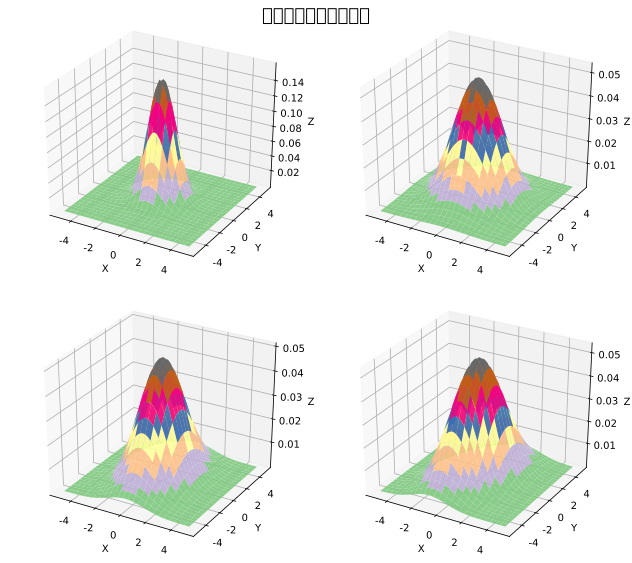

In [26]:
x1, x2 = np.mgrid[-5:5:51j, -5:5:51j]
x = np.stack((x1, x2), axis=2)

mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize=(9, 8), facecolor='w')
sigma = (np.identity(2), np.diag((3,3)), np.diag((2,5)), np.array(((2,1), (1,5))))  #模拟四个二元σ
for i in np.arange(4):
    ax = plt.subplot(2, 2, i+1, projection='3d')
    norm = stats.multivariate_normal((0, 0), sigma[i])    #期望分别为(0, 0)
    y = norm.pdf(x)
    ax.plot_surface(x1, x2, y, cmap=cm.Accent, rstride=2, cstride=2, alpha=0.9, lw=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
plt.suptitle('二元高斯分布方差比较', fontsize=18)
plt.tight_layout(1.5)
plt.show()

### &nbsp;&nbsp;&nbsp;泊松分布，Probability Density Function(pdf) = $P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda}$

In [ ]:
lmd1, k1, samples = 4, 2, 1000
lmd2, k2, samples = 6, 3, 1000
rate1 = np.random.poisson(lmd1, k1, samples)
rate2 = stats.poisson.rvs(lmd2, lmd2, samples)


plt.figure()

'''绘制离散正态分布'''
plt.subplot(221)
count, bins, ignored = plt.hist(rate1, 150, density=True, color='#294AA4', alpha = 0.9)    #count = 每一bin区间对应概率值, bins = 每个bin的分界值(对应左侧)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), 'r-', lw=2, alpha = 0.5)

count, bins, ignored = plt.hist(rate2, 150, density=True, color='#4A148C', alpha = 0.9)    #count = 每一bin区间对应概率值, bins = 每个bin的分界值(对应左侧)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 'g-', lw=2, alpha = 0.5)

'''绘制pdf'''
plt.subplot(222)
x = np.linspace(stats.norm(mu1, sigma1).ppf(0.001), stats.norm(mu1, sigma1).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu1, sigma1).pdf(x), 'r-', lw=2, alpha=0.6, label='norm pdf')

x = np.linspace(stats.norm(mu2, sigma2).ppf(0.001), stats.norm(mu2, sigma2).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu2, sigma2).pdf(x), 'g-', lw=2, alpha=0.6, label='norm pdf')

'''绘制cdf'''
plt.subplot(223)
x = np.linspace(stats.norm(mu1, sigma1).ppf(0.001), stats.norm(mu1, sigma1).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu1, sigma1).cdf(x), 'r-', lw=2, alpha=0.6, label='norm cdf')

x = np.linspace(stats.norm(mu2, sigma2).ppf(0.001), stats.norm(mu2, sigma2).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu2, sigma2).cdf(x), 'g-', lw=2, alpha=0.6, label='norm cdf')


plt.subplot(224)
plt.plot(1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 'r-', lw=2, alpha = 0.5)

plt.show()